In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from astropy.io import fits


In [2]:
ulx_file = '../data/external/Earnshaw_ULX_cat/earnshaw_Xraycatalogue.fits'
with fits.open(ulx_file) as hdul:
    #hdul.info()
    data = pd.DataFrame(hdul[1].data)

In [3]:
data

,DETID,SRCID,DR3SRCID,DR3DETID,DR3DETDIST,DR3SRCDIST,DR3MULT,IAUNAME,SRC_NUM,OBS_ID,...,EP_8_LUMINOSITY_MAX,IN_CP02,IN_S04,IN_LB05,IN_LM05,IN_S11,IN_W11,IS_COMPLETE_38,IS_COMPLETE_39,IS_COMPLETE_40
0,382,118684,156,156,3.412370,3.412370,1,3XMM J000155.3-152551,26,0204790101,...,3.706074e+36,False,False,False,False,False,False,True,True,True
1,396,118656,163,163,1.785300,1.785300,1,3XMM J000158.1-152758,3,0204790101,...,9.236017e+36,False,False,False,False,False,False,True,True,True
2,410,118560,170,170,0.752346,0.752346,1,3XMM J000201.4-153034,8,0204790101,...,6.361064e+36,False,False,False,False,False,False,True,True,True
3,430,118540,178,178,2.738700,2.738700,1,3XMM J000205.0-152504,9,0204790101,...,6.028317e+36,False,False,False,False,False,False,True,True,True
4,5169,122027,2335,2497,1.099720,1.099720,1,3XMM J002012.0+591756,79,0152260101,...,7.193321e+35,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2134,525383,43541,189988,-2147483648,NaN,2.288190,2,3XMM J233843.6-562849,25,0677770133,...,1.031139e+41,False,False,False,False,False,True,False,False,False
2135,525632,236202,190090,245060,1.201990,1.201990,1,3XMM J234000.7-121708,18,0055990301,...,1.107447e+39,False,False,False,False,False,True,False,False,False
2136,527019,241323,-2147483648,-2147483648,NaN,NaN,-32768,3XMM J234420.0+095548,24,0301651001,...,4.331900e+39,False,False,False,False,False,False,False,True,True
2137,529799,239871,191027,246016,0.586219,0.586219,1,3XMM J235122.5+200638,9,0093190301,...,1.188354e+40,False,False,False,False,False,True,False,False,True


In [4]:
# Filter to only include ULXs
data = data[data['EP_8_LUMINOSITY_MAX'] >1E39]

In [5]:
#Sources with more than 1 obervation
sources = data['SRCID'].value_counts()[data['SRCID'].value_counts() > 1].sort_values(ascending=False)
sources

894      13
1915     11
2049     10
2231     10
4349      7
         ..
29739     2
29749     2
32833     2
29790     2
34447     2
Name: SRCID, Length: 81, dtype: int64

In [6]:
src901 = data[data['SRCID'] == 901].sort_values(by=['MJD_START'])
src901

,DETID,SRCID,DR3SRCID,DR3DETID,DR3DETDIST,DR3SRCDIST,DR3MULT,IAUNAME,SRC_NUM,OBS_ID,...,EP_8_LUMINOSITY_MAX,IN_CP02,IN_S04,IN_LB05,IN_LM05,IN_S11,IN_W11,IS_COMPLETE_38,IS_COMPLETE_39,IS_COMPLETE_40
622,87552,901,29246,-2147483648,NaN,0.092017,16,3XMM J031818.4-663002,5,0150280201,...,1.100506e+39,False,False,True,False,False,False,False,False,False
618,87537,901,29246,37100,0.739589,0.092017,16,3XMM J031818.4-663002,4,0150280501,...,1.040845e+39,False,False,True,False,False,False,False,False,False
623,87542,901,29246,-2147483648,NaN,0.092017,16,3XMM J031818.4-663002,4,0150280701,...,1.151833e+39,False,False,True,False,False,False,False,False,False
619,87538,901,29246,37101,0.642394,0.092017,16,3XMM J031818.4-663002,4,0150281101,...,1.086083e+39,False,False,True,False,False,False,False,False,False
610,87543,901,29246,37106,0.506371,0.092017,16,3XMM J031818.4-663002,4,0205230501,...,1.086528e+39,False,False,True,False,False,False,False,False,False


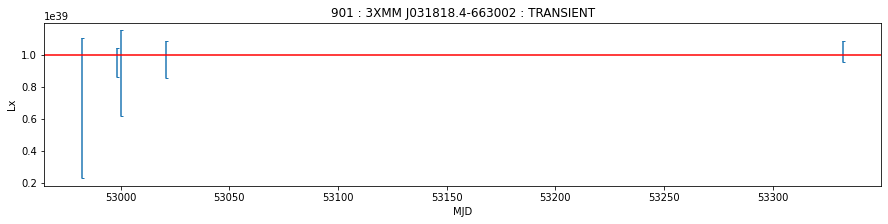

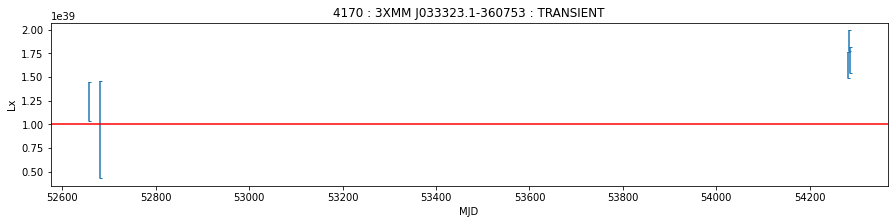

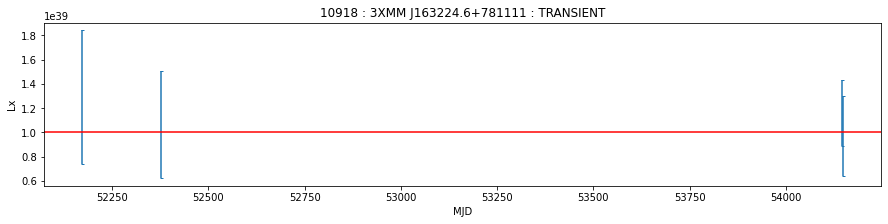

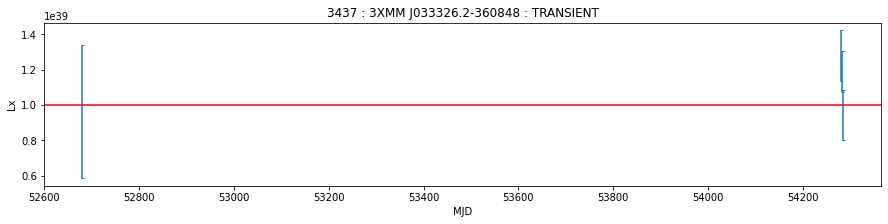

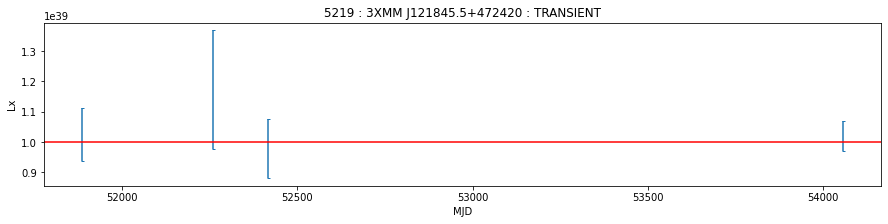

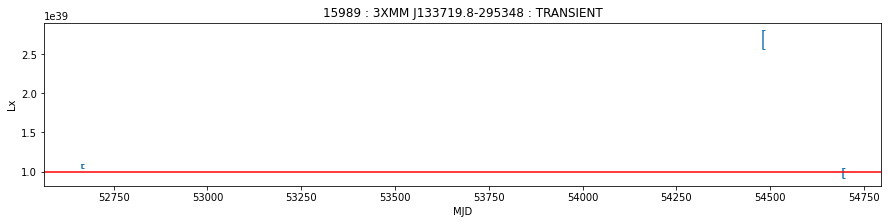

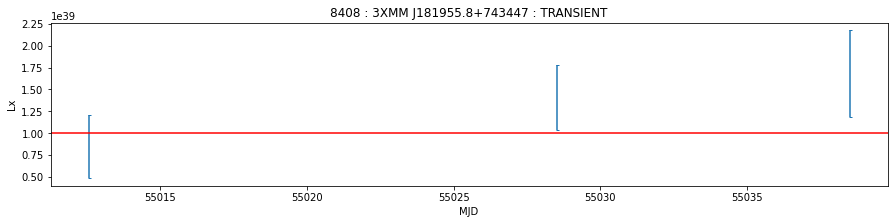

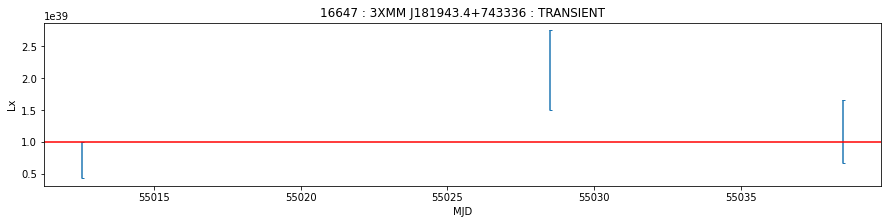

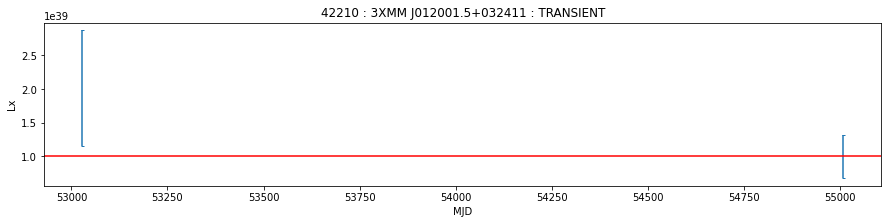

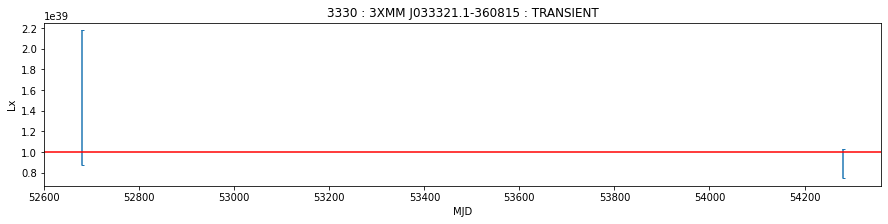

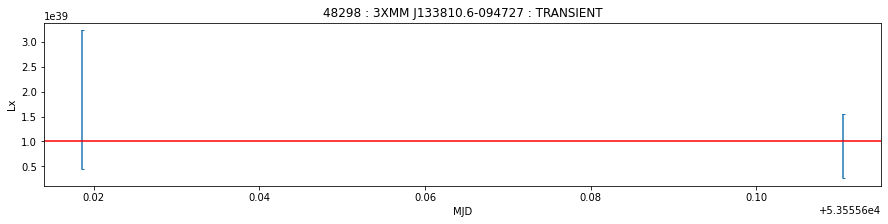

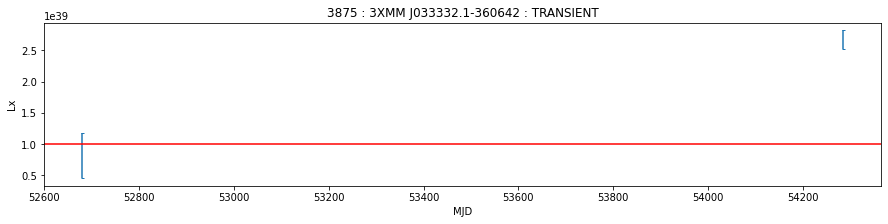

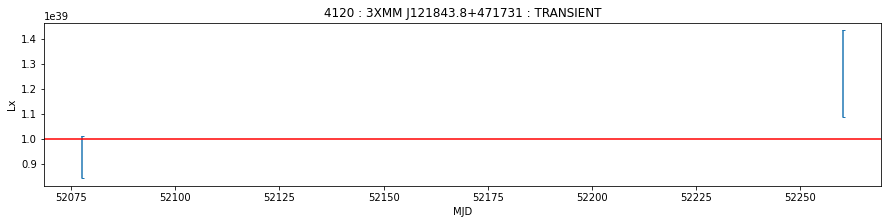

In [7]:
number_of_transients = 0
number_of_dead = 0
number_of_alive = 0
flux_limit = 1E39

for source in sources.index:
    subset = data[data['SRCID'] == source].sort_values(by=['MJD_START'])
    if max(subset['EP_8_LUMINOSITY']) > flux_limit and min(subset['EP_8_LUMINOSITY']) < flux_limit: #TRANSIENT
        plt.figure(figsize=(15,3))
        plt.ylabel('Lx')
        plt.xlabel('MJD')
        plt.title(str(subset['SRCID'].unique()[0]) + ' : ' + subset['IAUNAME'].unique()[0] + ' : TRANSIENT')
        plt.errorbar(subset['MJD_START'], subset['EP_8_LUMINOSITY'], yerr=subset['EP_8_LUMINOSITY_ERR'], fmt='none', capsize=1.5)
        plt.axhline(flux_limit, c='red')
        number_of_transients+=1
    elif max(subset['EP_8_LUMINOSITY_MAX']) < flux_limit: #DEAD
        number_of_dead+=1
    elif min(subset['EP_8_LUMINOSITY'] - subset['EP_8_LUMINOSITY_ERR']) > flux_limit: #Alive
        number_of_alive+=1

In [8]:
# Monte carlo simulation on the obtained lightcurves to deduce
# To what degree we can characterise a lightcurve as being
# Alive/dead/transient
MC_ITERATIONS = 100000

results_list = []

for source in sources.index:
    results = {}
    alive = 0
    dead = 0
    transient = 0
    print(f'Doing source: {source}')
    subset = data[data['SRCID'] == source].sort_values(by=['MJD_START'])
    simulated_luminosities = []
    
    for index, row in subset.iterrows():
        # print(f"index: {index} ep 8 luminosity: {row['EP_8_LUMINOSITY']}, err: {row['EP_8_LUMINOSITY_ERR']}")
        sample = np.random.normal(loc=row['EP_8_LUMINOSITY'], scale=row['EP_8_LUMINOSITY_ERR'], size=MC_ITERATIONS)
        simulated_luminosities.append(sample)
    
    for i in (np.array(simulated_luminosities).T):
        # print(f'out of {len(i)} points:')
        number_above = len(i[i > 1E39])
        number_below = len(i[i < 1E39])
        if number_below == 0:
            #print('alive')
            alive+=1
        elif number_above == 0:
            #print('dead')
            dead+=1
        else:
            #print(f'transient {number_above}, {number_below}')
            transient+=1
            
    results['SRCID'] = source
    results['alive'] = alive
    results['dead'] = dead
    results['transient'] = transient
    results_list.append(results)

Doing source: 894
Doing source: 1915
Doing source: 2049
Doing source: 2231
Doing source: 4349
Doing source: 5218
Doing source: 6996
Doing source: 901
Doing source: 3129
Doing source: 8508
Doing source: 4170
Doing source: 10333
Doing source: 14633
Doing source: 10918
Doing source: 10328
Doing source: 3374
Doing source: 3437
Doing source: 13415
Doing source: 10388
Doing source: 5219
Doing source: 15989
Doing source: 16088
Doing source: 17098
Doing source: 4101
Doing source: 16342
Doing source: 5231
Doing source: 16021
Doing source: 15621
Doing source: 4934
Doing source: 16132
Doing source: 8408
Doing source: 19949
Doing source: 16647
Doing source: 28571
Doing source: 35311
Doing source: 7245
Doing source: 35286
Doing source: 28451
Doing source: 28943
Doing source: 43541
Doing source: 21337
Doing source: 51071
Doing source: 17151
Doing source: 3277
Doing source: 42210
Doing source: 3330
Doing source: 5412
Doing source: 28995
Doing source: 58403
Doing source: 30058
Doing source: 48298
Doin

In [9]:
MC_results = pd.DataFrame(results_list)
MC_results['classification'] = MC_results[['alive','dead', 'transient']].idxmax(axis=1)
MC_results['confidence'] = MC_results[['alive','dead', 'transient']].max(axis=1)/MC_ITERATIONS
MC_results['confidence_squared'] = MC_results['confidence']**2
# https://faraday.physics.utoronto.ca/PVB/Harrison/ErrorAnalysis/Propagation.html

In [10]:
MC_results.sort_values(by='confidence')

,SRCID,alive,dead,transient,classification,confidence,confidence_squared
65,51654,44428,10289,45283,transient,0.45283,0.205055
60,35211,45475,8993,45532,transient,0.45532,0.207316
61,28876,46146,8917,44937,alive,0.46146,0.212945
43,3277,48771,6963,44266,alive,0.48771,0.237861
44,42210,44157,5850,49993,transient,0.49993,0.249930
...,...,...,...,...,...,...,...
33,28571,100000,0,0,alive,1.00000,1.000000
47,28995,100000,0,0,alive,1.00000,1.000000
37,28451,100000,0,0,alive,1.00000,1.000000
18,10388,100000,0,0,alive,1.00000,1.000000


In [11]:
number_of_alive = len(MC_results[MC_results['classification'] == 'alive'])
number_of_alive_err = np.sqrt(MC_results[MC_results['classification'] == 'alive']['confidence_squared'].sum())
number_of_transients = len(MC_results[MC_results['classification'] == 'transient'])
number_of_transients_err = np.sqrt(MC_results[MC_results['classification'] == 'transient']['confidence_squared'].sum())
number_of_dead = len(MC_results[MC_results['classification'] == 'dead'])
number_of_dead_err = np.sqrt(MC_results[MC_results['classification'] == 'dead']['confidence_squared'].sum())


#The total number here is defined only for the alive and transient systems
number_total = number_of_alive + number_of_transients
number_total_err = np.sqrt(number_of_alive_err**2 + number_of_transients_err**2)

percent_of_alive = number_of_alive / (number_total)
percent_of_transients = number_of_transients / (number_total)
percent_of_alive_err = percent_of_alive * np.sqrt((number_total_err/number_total)**2 +  (number_of_alive_err/number_of_alive)**2)
percent_of_transients_err = percent_of_transients * np.sqrt((number_total_err/number_total)**2 +  (number_of_transients_err/number_of_transients)**2)

In [12]:
print(f'Number of alive systems: {number_of_alive} +- {number_of_alive_err}')
print(f'Number of transient systems: {number_of_transients} +- {number_of_transients_err}')
print(f'Number of dead systems: {number_of_dead} +- {number_of_dead_err}')
print(f'% of alive systems: {percent_of_alive} +- {percent_of_alive_err}')
print(f'% of transient systems: {percent_of_transients} +- {percent_of_transients_err}')

Number of alive systems: 66 +- 7.439172764924875
Number of transient systems: 15 +- 2.745042084850431
Number of dead systems: 0 +- 0.0
% of alive systems: 0.8148148148148148 +- 0.12164503251185166
% of transient systems: 0.18518518518518517 +- 0.03843358047422777


<AxesSubplot:ylabel='classification'>

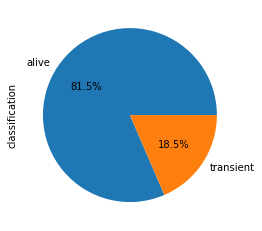

In [13]:
MC_results['classification'].value_counts().plot(kind='pie', autopct='%1.1f%%')

<AxesSubplot:ylabel='classification'>

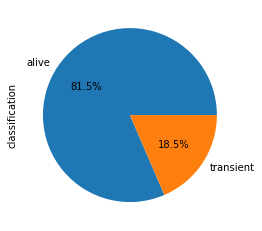

In [14]:
MC_results = MC_results[MC_results['classification'].isin(['transient', 'alive'])]
MC_results['classification'].value_counts().plot(kind='pie', autopct='%1.1f%%')

# Non - MC classification

In [15]:
print(f'Objects in Earnshaw cat: {len(data["SRCID"].unique())}')
print(f'Objects with more than 1 observation: {len(sources)}')
print(f'Number of Transient ULXs: {number_of_transients}')
print(f'Number of alive ULXs: {number_of_alive}')
print(f'Number of dead ULXs: {number_of_dead}')

Objects in Earnshaw cat: 384
Objects with more than 1 observation: 81
Number of Transient ULXs: 15
Number of alive ULXs: 66
Number of dead ULXs: 0


([<matplotlib.patches.Wedge at 0x7f41c0dca0b8>,
 [Text(-0.9190365757857503, 0.6044599013731208, 'alive'),
  Text(0.9190365474889388, -0.6044599443963279, 'transient'),
  Text(1.0999999999999954, -1.0298943298478347e-07, 'dead')],
 [Text(-0.5012926777013182, 0.329705400748975, '81.5%'),
  Text(0.5012926622666938, -0.3297054242161788, '18.5%'),
  Text(0.5999999999999974, -5.617605435533643e-08, '0.0%')])

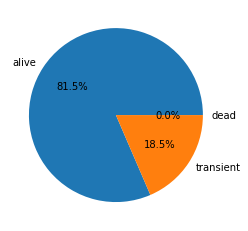

In [16]:
plt.pie([number_of_alive, number_of_transients, number_of_dead], labels=['alive', 'transient', 'dead',], autopct='%1.1f%%')

([<matplotlib.patches.Wedge at 0x7f41c0d13908>,
 [Text(-0.9190365757857503, 0.6044599013731208, 'alive'),
  Text(0.9190365474889388, -0.6044599443963279, 'transient')],
 [Text(-0.5012926777013182, 0.329705400748975, '81.5%'),
  Text(0.5012926622666938, -0.3297054242161788, '18.5%')])

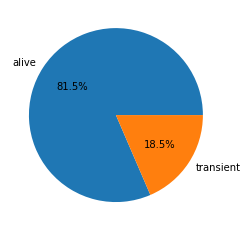

In [17]:
plt.pie([number_of_alive, number_of_transients], labels=['alive', 'transient'], autopct='%1.1f%%')

In [18]:
data['LOG_EP_8_LUMINOSITY'] = np.log10(data['EP_8_LUMINOSITY'])

/home/x1/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [19]:
bins = np.arange(36,42,0.25)
hist, bins = np.histogram(data['LOG_EP_8_LUMINOSITY'], bins=bins)
cumhist = sum(hist) - np.cumsum(hist)


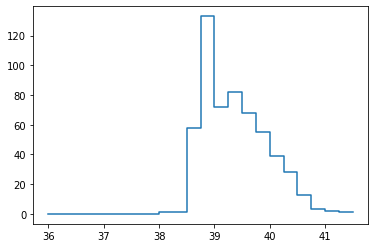

In [20]:
plt.step(bins[:-1],hist)

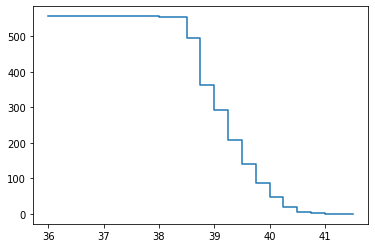

In [21]:
plt.step(bins[:-1],cumhist)

In [54]:
data.groupby(['SRCID']).sample(500, replace=True)

,DETID,SRCID,DR3SRCID,DR3DETID,DR3DETDIST,DR3SRCDIST,DR3MULT,IAUNAME,SRC_NUM,OBS_ID,...,EP_8_LUMINOSITY_MAX,IN_CP02,IN_S04,IN_LB05,IN_LM05,IN_S11,IN_W11,IS_COMPLETE_38,IS_COMPLETE_39,IS_COMPLETE_40
640,87590,894,29250,37134,0.773852,0.600845,16,3XMM J031819.9-662910,2,0150280301,...,1.806932e+40,True,False,True,True,False,True,False,False,False
644,87591,894,29250,37122,3.133370,0.600845,16,3XMM J031819.9-662910,2,0150280401,...,1.729394e+40,True,False,True,True,False,True,False,False,False
648,87588,894,29250,-2147483648,NaN,0.600845,16,3XMM J031819.9-662910,1,0150280701,...,1.372574e+40,True,False,True,True,False,True,False,False,False
642,87584,894,29250,37133,0.564584,0.600845,16,3XMM J031819.9-662910,1,0205230401,...,5.108058e+39,True,False,True,True,False,True,False,False,False
636,87582,894,29250,255122,0.455490,0.600845,16,3XMM J031819.9-662910,1,0405090101,...,8.310852e+39,True,False,True,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55,11658,371904,-2147483648,-2147483648,NaN,NaN,-32768,3XMM J003915.7+481951,180,0652210101,...,1.560480e+35,False,False,False,False,False,False,True,True,True
55,11658,371904,-2147483648,-2147483648,NaN,NaN,-32768,3XMM J003915.7+481951,180,0652210101,...,1.560480e+35,False,False,False,False,False,False,True,True,True
55,11658,371904,-2147483648,-2147483648,NaN,NaN,-32768,3XMM J003915.7+481951,180,0652210101,...,1.560480e+35,False,False,False,False,False,False,True,True,True
55,11658,371904,-2147483648,-2147483648,NaN,NaN,-32768,3XMM J003915.7+481951,180,0652210101,...,1.560480e+35,False,False,False,False,False,False,True,True,True


In [23]:
N_mc  = 10000
N_sys = 500
results_list = []

for source in sources.index:
    print(f'Doing source: {source}')
    subset = data[data['SRCID'] == source].sort_values(by=['MJD_START'])
    simulated_luminosities = []
    
    for index, row in subset.iterrows():
        # print(f"index: {index} ep 8 luminosity: {row['EP_8_LUMINOSITY']}, err: {row['EP_8_LUMINOSITY_ERR']}")
        L_sample = np.random.normal(loc=row['EP_8_LUMINOSITY'], scale=row['EP_8_LUMINOSITY_ERR'], size=N_mc)
        L_mean = np.mean(L_sample)
        L_std  = np.std(L_sample)
        print(f'L={L_mean}+-{L_std}')

Doing source: 894
L=8.773761949972395e+39+-9.083769999085137e+37
L=1.1346303415716526e+40+-8.061476146359123e+38
L=1.7739191208316167e+40+-3.283181087608948e+38
L=1.68290247179823e+40+-4.636904762761221e+38
L=1.321779599525155e+40+-5.0916139553665854e+38
L=1.4350001690123274e+40+-2.9156637932632526e+38
L=1.4393833754007145e+40+-3.019948846512448e+38
L=1.0988352905194142e+40+-3.668403634105972e+38
L=1.8284587235917917e+40+-2.3082643140508914e+38
L=5.0081574385932807e+39+-9.796371884610597e+37
L=1.0521894019827904e+40+-2.0913176155761956e+38
L=1.9822098498593885e+40+-3.674593236760403e+38
L=8.268900675222186e+39+-4.191399973276486e+37
Doing source: 1915
L=7.620761000339928e+39+-1.1273446252806654e+38
L=7.206590372769635e+39+-1.0505402768598807e+38
L=8.357478193711532e+39+-1.6575553190735936e+38
L=5.563564830971922e+39+-1.1489037628215611e+38
L=5.1725287723992066e+39+-1.2152791057387193e+38
L=5.55100474685714e+39+-2.23914156352214e+37
L=5.400772660325006e+39+-3.191954198396646e+37
L=6.736

In [24]:
simulated_luminosities

[]

In [25]:
from tqdm import tqdm
N_mc=10000
N_sys=500
# XLF Settings
bin_min = 38
bin_max = 43
bin_width = 0.25
bins = np.arange(bin_min, bin_max, bin_width)
nbins = len(bins)
bin_centers = 0.5 * (bins[:-1] + bins[1:])

hists = np.ndarray((N_mc, nbins-1), dtype=np.int32)

for i in tqdm(range(N_mc)):
    selected_sources = np.random.choice(sources.index, N_sys) #will contain duplicates
    Ls = []
    for source in selected_sources:
        sub = data[data['SRCID'] == source].sort_values(by=['MJD_START'])
        sub = sub.sample(1) # Select one row from the subset
        L_samp = np.random.normal(loc=sub['EP_8_LUMINOSITY'], scale=sub['EP_8_LUMINOSITY_ERR'])
        Ls.append(*L_samp)

    Ls = np.array(Ls)
    Ls = np.log10(Ls)
    hist, bins = np.histogram(Ls, bins=bins)
    cumhist = sum(hist) - np.cumsum(hist)
    hists[i] = cumhist

  1%|          | 97/10000 [01:04<1:50:09,  1.50it/s]


KeyboardInterrupt: 

In [ ]:
np.save('../data/XLF_CAT/XLF_EARNSHAW,N_mc-10000,N_sys-500.npy', hists)

In [ ]:
m = hists.mean(axis=0)
std = hists.std(axis=0)
plt.errorbar(bin_centers, y=m, yerr=std, ds='steps-mid')


In [ ]:
bin_centers

In [ ]:
plt.step(bin_centers, hist)

In [ ]:
plt.step(bin_centers, cumhist)

In [26]:
# 31/03/2020 Getting array of N_sys*N_mc of luminosities from catalogue

In [27]:
import powerlaw

In [28]:
Ls = np.ndarray((N_mc,N_sys))

In [55]:
ulx_file = '../data/external/Earnshaw_ULX_cat/earnshaw_Xraycatalogue.fits'
with fits.open(ulx_file) as hdul:
    #hdul.info()
    data = pd.DataFrame(hdul[1].data)

In [64]:
sub = data[['SRCID', 'EP_8_LUMINOSITY', 'EP_8_LUMINOSITY_ERR']]
sub

,SRCID,EP_8_LUMINOSITY,EP_8_LUMINOSITY_ERR
0,118684,2.692657e+36,1.013417e+36
1,118656,7.985324e+36,1.250692e+36
2,118560,5.147298e+36,1.213765e+36
3,118540,4.711121e+36,1.317196e+36
4,122027,5.400172e+35,1.793150e+35
...,...,...,...
2134,43541,7.370659e+40,2.940729e+40
2135,236202,8.350492e+38,2.723975e+38
2136,241323,3.531174e+39,8.007255e+38
2137,239871,1.040011e+40,1.483431e+39


In [86]:
L = sub.sample(500).apply(sample,axis=1)
L = L.values
L

array([ 1.00172226e+38,  2.38295577e+38,  4.00118726e+36,  5.96031495e+37,
        3.70278809e+40,  2.26102539e+38,  4.18182959e+36,  7.40195747e+34,
        1.18252739e+34,  7.18906230e+35,  3.65960760e+39,  4.99874117e+38,
        6.76567853e+37,  7.02328686e+38,  4.32930833e+38, -4.81273212e+38,
       -3.28619431e+39,  3.78545944e+38,  1.24503589e+37,  1.75550064e+37,
        5.98692764e+37,  9.47983975e+37,  4.93780956e+37,  5.40328855e+38,
        1.33682835e+39,  4.39565758e+38,  1.51550944e+38,  7.31994859e+38,
        5.34779331e+36,  1.21167551e+40,  3.79313273e+38,  1.93939882e+37,
        2.13320193e+38,  2.87456128e+41,  5.12260188e+39,  1.37234066e+36,
        1.18011770e+38,  2.14850844e+38,  1.29627571e+39,  6.39414685e+37,
        1.81563079e+37,  6.64608306e+35,  5.64362752e+36,  2.60990152e+36,
        7.18201708e+37,  1.79093853e+36,  8.45549931e+39,  2.31227888e+39,
        1.07520818e+38,  3.94968217e+36,  2.90673916e+38,  4.15529358e+38,
        4.49598543e+38,  

/home/x1/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log10
  """Entry point for launching an IPython kernel.


(array([ 1.,  0.,  1.,  1.,  0.,  4.,  3.,  0.,  2.,  0.,  1.,  1.,  2.,
         0.,  1.,  3.,  0.,  0.,  2.,  1.,  1.,  1.,  0.,  0.,  5.,  1.,
         0.,  2.,  8.,  1.,  0.,  1.,  2.,  4.,  5.,  4.,  1.,  7.,  5.,
        10., 10.,  8.,  9.,  7.,  6.,  5., 11.,  8.,  9.,  9., 10.,  8.,
         7., 16., 10., 11., 12.,  9.,  6.,  8., 19., 13.,  7., 23., 18.,
        14., 22.,  8.,  8.,  8., 10.,  8.,  3.,  6.,  4.,  6.,  5.,  7.,
         6.,  4.,  4.,  4.,  1.,  3.,  2.,  3.,  0.,  1.,  3.,  0.,  2.,
         5.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  2.]),
 array([33.62135064, 33.69972285, 33.77809506, 33.85646727, 33.93483948,
        34.01321169, 34.0915839 , 34.1699561 , 34.24832831, 34.32670052,
        34.40507273, 34.48344494, 34.56181715, 34.64018936, 34.71856157,
        34.79693378, 34.87530599, 34.9536782 , 35.03205041, 35.11042262,
        35.18879483, 35.26716704, 35.34553924, 35.42391145, 35.50228366,
        35.58065587, 35.65902808, 35.73740029, 35.8157725 , 35.894144

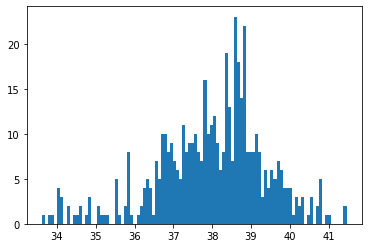

In [87]:
plt.hist(np.log10(L), bins=100)

In [74]:
def sample(df):
    return np.random.normal(loc=df['EP_8_LUMINOSITY'], scale=df['EP_8_LUMINOSITY_ERR'])
sub['L_SAMP'] = sub.apply(sample, axis=1)

/home/x1/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [70]:
sub['L_SAMP'].describe()

count    2.139000e+03
mean     3.069323e+39
std      1.493559e+40
min     -1.435935e+40
25%      1.352053e+37
50%      1.655163e+38
75%      8.328308e+38
max      3.355025e+41
Name: L_SAMP, dtype: float64

In [51]:
sub.groupby(['SRCID']).groups

{894: [636, 637, 638, 639, 640, 641, 642, 643, 644, 645, 646, 647, 648], 901: [610, 611, 612, 613, 614, 615, 616, 617, 618, 619, 620, 621, 622, 623], 1030: [1243], 1448: [598, 599, 600, 601, 602, 603, 604, 605, 606, 607, 608], 1498: [624, 625, 626, 627, 628, 629, 630, 631, 632, 633, 634, 635], 1915: [1848, 1849, 1850, 1851, 1852, 1853, 1854, 1855, 1856, 1857, 1858], 1972: [83, 84, 85, 86, 87, 88, 89, 90, 91, 92], 1983: [583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593], 2049: [1255, 1256, 1257, 1258, 1259, 1260, 1261, 1262, 1263, 1264], 2180: [2019, 2020, 2021, 2022, 2023], 2231: [2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018], 2241: [98, 99, 100, 101, 102, 103, 104, 105], 2242: [2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008], 2602: [1988, 1989, 1990, 1991, 1992, 1993, 1994], 2630: [1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982], 2732: [1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945], 2749: [652, 653, 654, 655, 656, 657, 658], 3129: [724, 725, 726, 727, 728], 3137: 

In [32]:
# remove large errors


In [33]:
#ALL Sources
sources = data['SRCID'].value_counts()
sources

19010     2
56060     2
60380     1
58590     1
332125    1
50268     1
131622    1
357274    1
63570     1
116439    1
22289     1
173091    1
114704    1
172942    1
361268    1
57827     1
116550    1
5701      1
319271    1
46487     1
105087    1
291326    1
116326    1
358247    1
64848     1
172642    1
362236    1
350260    1
58294     1
281332    1
172707    1
331434    1
365997    1
116524    1
60843     1
362157    1
50924     1
24999     1
158117    1
Name: SRCID, dtype: int64

In [ ]:
data2 = data.set_index(['SRCID'])

In [ ]:
from tqdm import tqdm
N_mc = 1000
N_sys=500


Ls = np.ndarray((N_mc,N_sys), dtype=np.float)

for i in tqdm(range(N_mc)):

    selected_sources = np.random.choice(sources.index, N_sys) #will contain duplicates
    L = []
    for source in selected_sources:
        sub = data2.loc[source]
        if len(sub) != 422: #If we selected a source with more than 1 observation
                sub = sub.sample(1) # Select one row from the subset
        #print(sub)
        L_samp = np.random.normal(loc=sub['EP_8_LUMINOSITY'], scale=sub['EP_8_LUMINOSITY_ERR'])
        L_samp = float(L_samp)
        assert L_samp > 1e30
        L.append(L_samp)
    Ls[i] = np.array(L)

In [ ]:
np.save(f'../data/L_samp_earnshaw,N_mc-{N_mc}.npy', Ls)

In [ ]:
data['EP_8_LUMINOSITY'].min()

In [ ]:
data['EP_8_LUMINOSITY_ERR']

In [ ]:
%timeit sub.sample(1) # Select one row from the subset

In [ ]:
%timeit data[data['SRCID'] == source].sort_values(by=['MJD_START'])

In [ ]:
%timeit np.random.normal(loc=sub['EP_8_LUMINOSITY'], scale=sub['EP_8_LUMINOSITY_ERR'])

In [ ]:
np.array(Ls)

In [ ]:
fit = powerlaw.Fit(Ls)

In [ ]:
fit.plot_ccdf()
print(f'xmin = {fit.xmin:.2e}')
print(f'alpha= {fit.alpha:.2f} sigma={fit.sigma:.2f}')